In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Why AMC?
## Well other then the fact that it is currently a meme stock, or rather a reddit stock. I actually really liked the shows that the company produced, it holds a special place in my childhood. I'm also curious on attaching news bits, season releases and ongoing shows to the companys stock value. That being said, AMC to the moon.

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv("AMC.csv",index_col='Date', parse_dates=['Date'], date_parser=dateparse)

<ipython-input-2-5029bf3efccd>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-18,19.180000,19.790001,18.900000,18.900000,13.593408,5457200
2013-12-19,18.900000,19.490000,18.809999,19.490000,14.017756,1605400
2013-12-20,19.650000,19.770000,19.400000,19.680000,14.154408,737100
2013-12-23,19.790001,19.990000,19.500000,19.740000,14.197564,698100
2013-12-24,19.740000,19.820000,19.500000,19.530001,14.046525,213700


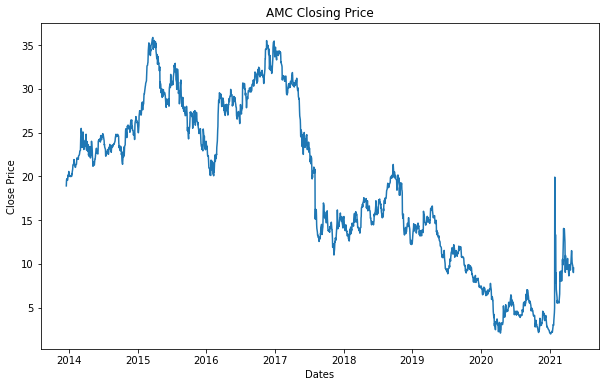

In [4]:
plt.figure(figsize=(10, 6))
plt.xlabel("Dates")
plt.ylabel("Close Price")
plt.plot(df['Close'])
plt.title("AMC Closing Price")
plt.show()

Text(0, 0.5, 'Closing Price')

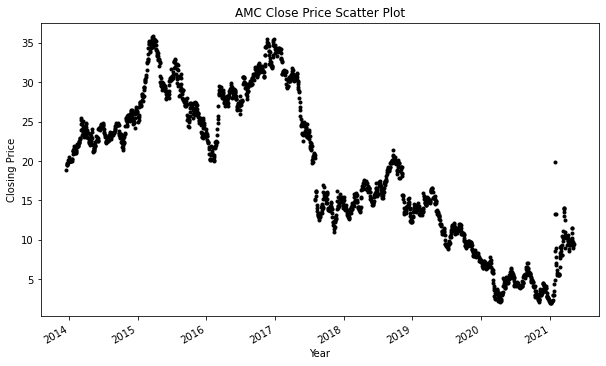

In [6]:
df_close = df["Close"]

df_close.plot(style='k.', figsize=(10,6))

plt.title("AMC Close Price Scatter Plot")
plt.xlabel("Year")
plt.ylabel("Closing Price")


## Breaking Bad (2008 - 13)
## The Walking Dead (2010 - Present)
## Better Call Saul (2015 - Present[Delayed due to COVID])
## Into the Badlands (2015 - 19)
## Mad Men (2007 - 15)
## Hell on Wheels (2011 - 16)
## Turn (2014 - 17)

### Just a small list of the shows, this list consists of, shows I've watched, friends have watched, popularity and level of advertisements I experienced. Of course AMC has way more shows available.

## Lag plots are commonly used to look for patterns

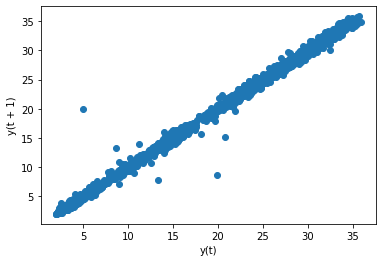

In [7]:
pd.plotting.lag_plot(df_close, lag=1)

## So we can confirm that there is some auto correlation in this data with the use of this data.



## Dealing with stock prices, we can use time series analysis to see the change in value over time.
# Step 1
## First determine if the data set is stationary
## i.e if the mean, variance, correlation is constant through various time stamps.
## We will use the Augmented Dickey-Fuller Test
## Using this we will determine how strongly AMC's data is defined by a trend.
## With a null hypothesis of data is non-stationary.
## Alternate Hypothesis tthat the data is stationary.

In [9]:
X = df_close.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.037730
p-value: 0.739256
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## The p-value is greater then the significant values given at each confidence level and the ADF value is greater than all critical values. Therefore we cannot reject the null hypothesis and the data is therefore non-stationary. 
## I.e. the data doesn't have consistent mean, variance or correlation.  